# Projeto de Análise Exploratória de Dados (EDA)

**Disciplina:** [Ciência de Dados]  
**Professor(a):** [Madson Dias]  
**Equipe:**  
- Alan De Oliveira Gonçalves
- Ayrton Lucas Viana Albuquerque Silva
- Cauan Halison Arantes de Oliveira
- Hosana Maria Ferro Dias

**Conjunto de Dados:** [sleep_efficiency.csv]  
**Fonte:** [https://www.kaggle.com/datasets/equilibriumm/sleep-efficiency/data]

# Preparação dos dados


### Nesta etapa fazemos:

- Carregamento de biblioteca
- Leitura do conjunto de dados
- Informações iniciais

In [136]:
# @title Importação das Bibliotecas

import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown

In [137]:
# @title Configuração do Path para importação de módulos

# Adicionar a pasta src ao path
sys.path.append('..')

# Importar função utilitária
from src.data.utils import get_output_path

In [138]:
# @title Leitura do conjunto de dados

df = pd.read_csv(
    "https://raw.githubusercontent.com/atlantico-academy/datasets/refs/heads/main/sleep_efficiency.csv"
)

In [139]:
# @title Informações Iniciais
display(Markdown("### Primeiras Linhas"))
display(df.head())

display(Markdown("### Últimas Linhas"))
display(df.tail())

display(Markdown("### Informações das variáveis"))
df.info()

display(Markdown("### Quantidade de valores únicos"))
df.nunique()


### Primeiras Linhas

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


### Últimas Linhas

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0
451,452,18,Male,2021-03-17 02:30:00,2021-03-17 10:00:00,7.5,0.63,22,23,55,1.0,50.0,0.0,No,1.0


### Informações das variáveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

### Quantidade de valores únicos

ID                        452
Age                        61
Gender                      2
Bedtime                   424
Wakeup time               434
Sleep duration              9
Sleep efficiency           50
REM sleep percentage       13
Deep sleep percentage      29
Light sleep percentage     29
Awakenings                  5
Caffeine consumption        6
Alcohol consumption         6
Smoking status              2
Exercise frequency          6
dtype: int64

# Limpeza e Pré-Processamento

In [140]:
# @title Limpeza e Pré-Processamento

# 1. Copiando o dataframe para não alterar o original
df_tratado = df.copy()

# 2. Convertendo as colunas de data e hora
df_tratado['Bedtime'] = pd.to_datetime(df_tratado['Bedtime'])
df_tratado['Wakeup time'] = pd.to_datetime(df_tratado['Wakeup time'])

# 3. Verificando a quantidade de dados faltantes em cada coluna
print("### Dados Faltantes por Coluna ###")
print(df_tratado.isnull().sum())

median_cols = ['Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']
for col in median_cols:
    median_val = df_tratado[col].median()
    df_tratado[col] = df_tratado[col].fillna(median_val)

# Verificando se ainda há dados faltantes
print("\n### Dados Faltantes após o tratamento ###")
print(df_tratado.isnull().sum())

# 4. Criando pasta e salvando o dataframe tratado
# output_dir = os.path.join("..", "data", "processed")  # ../ volta para a raiz do projeto
# os.makedirs(output_dir, exist_ok=True) # Cria o diretório se não existir
# output_path = os.path.join(output_dir, "Sleep_Efficiency_Processed.csv")
# df_tratado.to_csv(output_path, index=False)

### Dados Faltantes por Coluna ###
ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

### Dados Faltantes após o tratamento ###
ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64


In [141]:
# @title Salvar dados processados

# Usar a função para detectar o ambiente automaticamente
output_path = get_output_path("Sleep_Efficiency_Processed.csv")

# Salvar o DataFrame tratado
df_tratado.to_csv(output_path, index=False)

# 5. Informações finais sobre o dataset tratado
print(f"\nArquivo salvo com sucesso!")
print(f"Localização completa: {os.path.abspath(output_path)}")
print(f"Shape do dataset: {df_tratado.shape}")
print(f"Colunas: {list(df_tratado.columns)}")

Ambiente: Local

Arquivo salvo com sucesso!
Localização completa: D:\Projetos\hypnos-data\data\processed\Sleep_Efficiency_Processed.csv
Shape do dataset: (452, 15)
Colunas: ['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration', 'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Smoking status', 'Exercise frequency']


### A partir das informações iniciais, podemos dizer que:

* O conjunto de dados tem 452 unidades amostrais com 15 variáveis

* Classificação das variáveis:
  * Quantitativa contínua: `Sleep duration`, `Sleep efficiency`, `Awakenings`
  * Quantitativa discreta: `ID`, `Age`, `REM Sleep percentage`, `Deep sleep percentage`, `Light sleep percentage`, `Caffeine comsumption`, `Alcohol consumption`
  * Qualitativa nominal: `Gender`, `Smoking status`, `Exercise frequency`
  * Qualitativa ordinal: `Bedtime`, `Wakeup time`

---

# Descrição de dados

In [142]:
# @title Dicionário dos dados
df_dict = pd.DataFrame([
    {
        "variavel": "ID",
        "descricao": "Identificação do paciente",
        "tipo": "quantitativa",
        "subtipo": "discreta",
    },
    {
        "variavel": "Age",
        "descricao": "Idade do paciente",
        "tipo": "quantitativa",
        "subtipo": "discreta",
    },
    {   "variavel": "Gender",
        "descricao": "Gênero do paciente",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "Bedtime",
        "descricao": "Hora que cada paciente vai para cama",
        "tipo": "qualitativa",
        "subtipo": "ordinal",
    },
    {
        "variavel": "Wakeup time",
        "descricao": "Hora que cada paciente acorda",
        "tipo": "qualitativa",
        "subtipo": "ordinal",
    },
    {
        "variavel": "Sleep duration",
        "descricao": "Duração do sono em horas",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "Sleep efficiency",
        "descricao": "Proporção do tempo na cama que foi realmente gasto dormindo",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "REM sleep percentage",
        "descricao": "Tempo gasto em sono REM",
        "tipo": "quantitativa",
        "subtipo": "discreta",
    },
    {
        "variavel": "Deep sleep percentage",
        "descricao": "Tempo gasto em sono profundo",
        "tipo": "quantitativa",
        "subtipo": "discreta",
    },
    {
        "variavel": "Light sleep percentage",
        "descricao": "Tempo gasto em sono leve",
        "tipo": "quantitativa",
        "subtipo": "discreta",
    },
    {
        "variavel": "Awakenings",
        "descricao": "Número de vezes que cada sujeito acorda durante a noite",
        "tipo": "quantitativa",
        "subtipo": "discreta",
    },
    {
        "variavel": "Caffeine comsumption",
        "descricao": " Consumo de cafeína nas 24 horas anteriores à hora de dormir",
        "tipo": "quantitativa",
        "subtipo": "discreta",
    },
    {
        "variavel": "Alcohol consumption",
        "descricao": "Consumo de álcool nas 24 horas anteriores à hora de dormir",
        "tipo": "quantitativa",
        "subtipo": "discreta",
    },
    {
        "variavel": "Smoking status",
        "descricao": "Estado de fumante de cada paciente",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "Exercise frequency",
        "descricao": "Frequência de exercícios de cada paciente em horas",
        "tipo": "qualitativa",
        "subtipo": "ordinal",
    }
])
df_dict

,variavel,descricao,tipo,subtipo
0,ID,Identificação do paciente,quantitativa,discreta
1,Age,Idade do paciente,quantitativa,discreta
2,Gender,Gênero do paciente,qualitativa,nominal
3,Bedtime,Hora que cada paciente vai para cama,qualitativa,ordinal
4,Wakeup time,Hora que cada paciente acorda,qualitativa,ordinal
5,Sleep duration,Duração do sono em horas,quantitativa,contínua
6,Sleep efficiency,Proporção do tempo na cama que foi realmente g...,quantitativa,contínua
7,REM sleep percentage,Tempo gasto em sono REM,quantitativa,discreta
8,Deep sleep percentage,Tempo gasto em sono profundo,quantitativa,discreta
9,Light sleep percentage,Tempo gasto em sono leve,quantitativa,discreta


---
### Observações:

* A maioria dos participantes não é fumante.
* A frequência de exercícios varia bastante, com muitas pessoas se exercitando três vezes por semana ou nenhum dia.
* A média da idade é de 40 anos e a duração do sono tem em média 7 horas e duração mínima de 5 horas.
* O gênero masculino tem uma leve predominância.
---


# Resumo estatístico e gráficos

In [143]:
# @title Resumo Estatístico

display(Markdown("### Variáveis qualitativas"))
print(df.describe(include='object'))

display(Markdown("### Variáveis quantitativas"))
print(df.describe())

### Variáveis qualitativas

       Gender              Bedtime          Wakeup time Smoking status
count     452                  452                  452            452
unique      2                  424                  434              2
top      Male  2021-03-11 01:00:00  2021-11-25 06:00:00             No
freq      228                    3                    2            298


### Variáveis quantitativas

               ID         Age  Sleep duration  Sleep efficiency  \
count  452.000000  452.000000      452.000000        452.000000   
mean   226.500000   40.285398        7.465708          0.788916   
std    130.625419   13.172250        0.866625          0.135237   
min      1.000000    9.000000        5.000000          0.500000   
25%    113.750000   29.000000        7.000000          0.697500   
50%    226.500000   40.000000        7.500000          0.820000   
75%    339.250000   52.000000        8.000000          0.900000   
max    452.000000   69.000000       10.000000          0.990000   

       REM sleep percentage  Deep sleep percentage  Light sleep percentage  \
count            452.000000             452.000000              452.000000   
mean              22.615044              52.823009               24.561947   
std                3.525963              15.654235               15.313665   
min               15.000000              18.000000                7.000000   
25%   

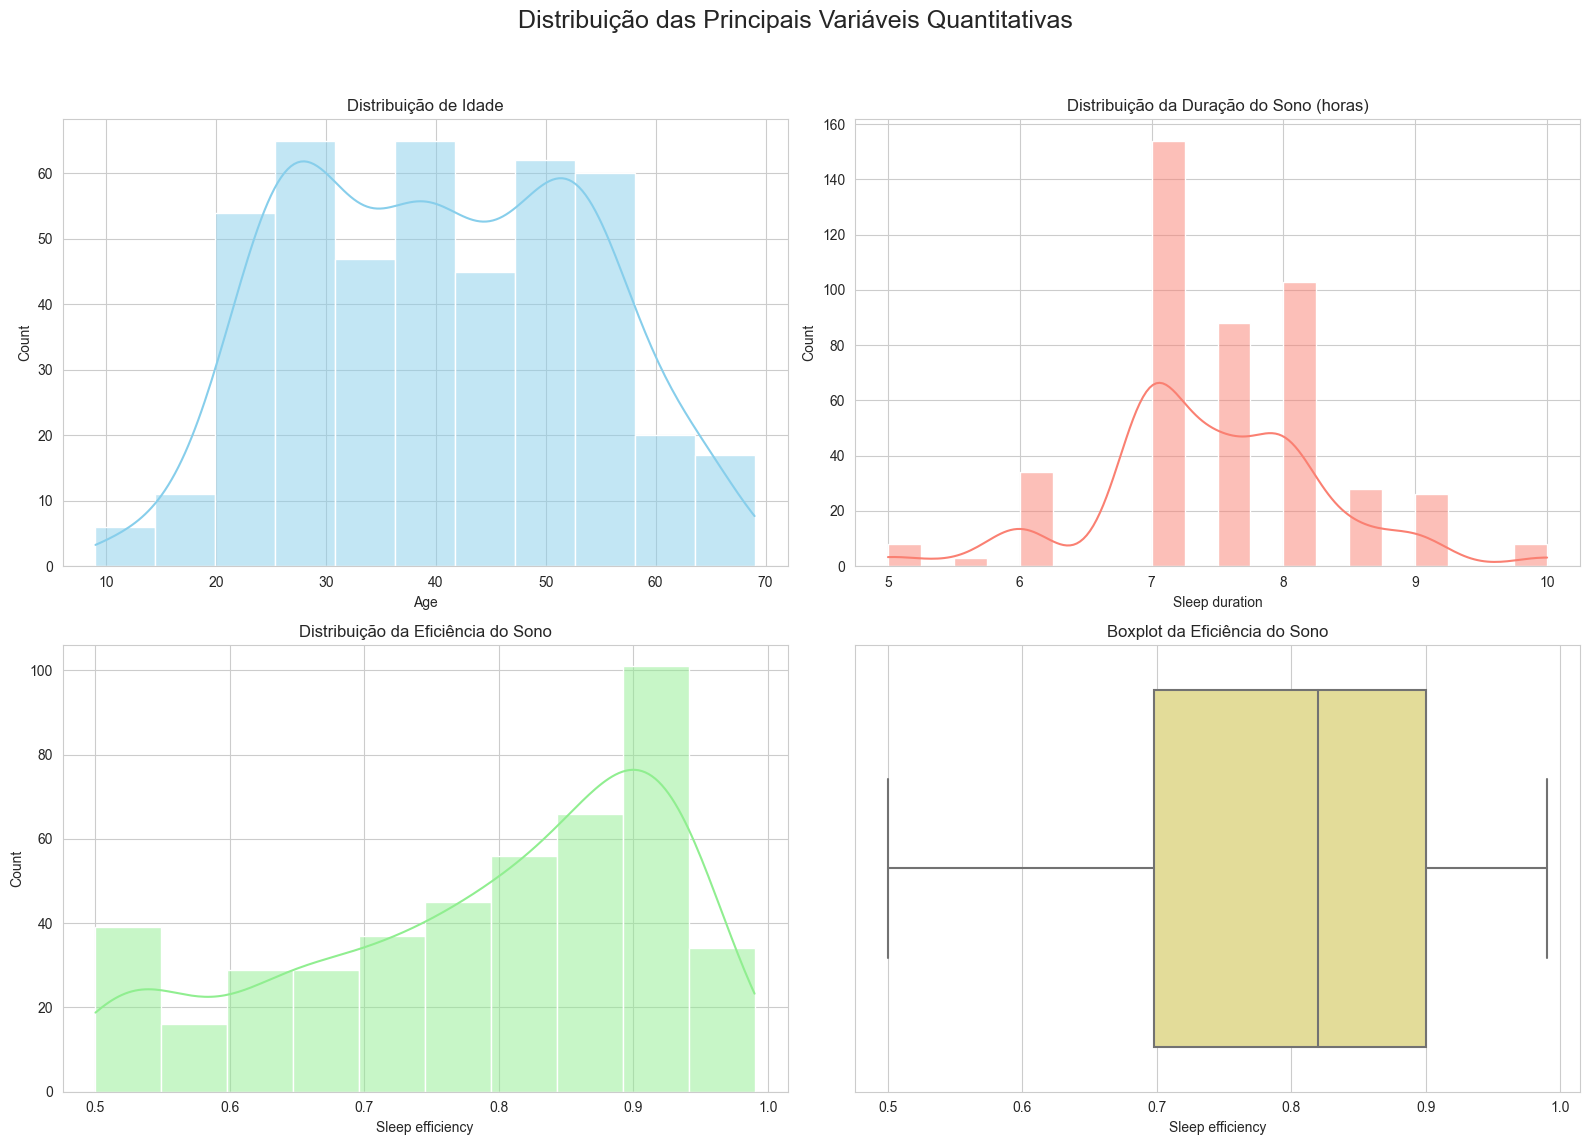

In [144]:
# @title Gráficos de distribuição das variáveis quantitativas

# Configura o estilo dos gráficos
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribuição das Principais Variáveis Quantitativas', fontsize=18)

# Gráfico para 'Age'
sns.histplot(data=df_tratado, x='Age', kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribuição de Idade')

# Gráfico para 'Sleep duration'
sns.histplot(data=df_tratado, x='Sleep duration', kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Distribuição da Duração do Sono (horas)')

# Gráfico para 'Sleep efficiency'
sns.histplot(data=df_tratado, x='Sleep efficiency', kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Distribuição da Eficiência do Sono')

# Boxplot para 'Sleep efficiency'
sns.boxplot(data=df_tratado, x='Sleep efficiency', ax=axes[1, 1], color='khaki')
axes[1, 1].set_title('Boxplot da Eficiência do Sono')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

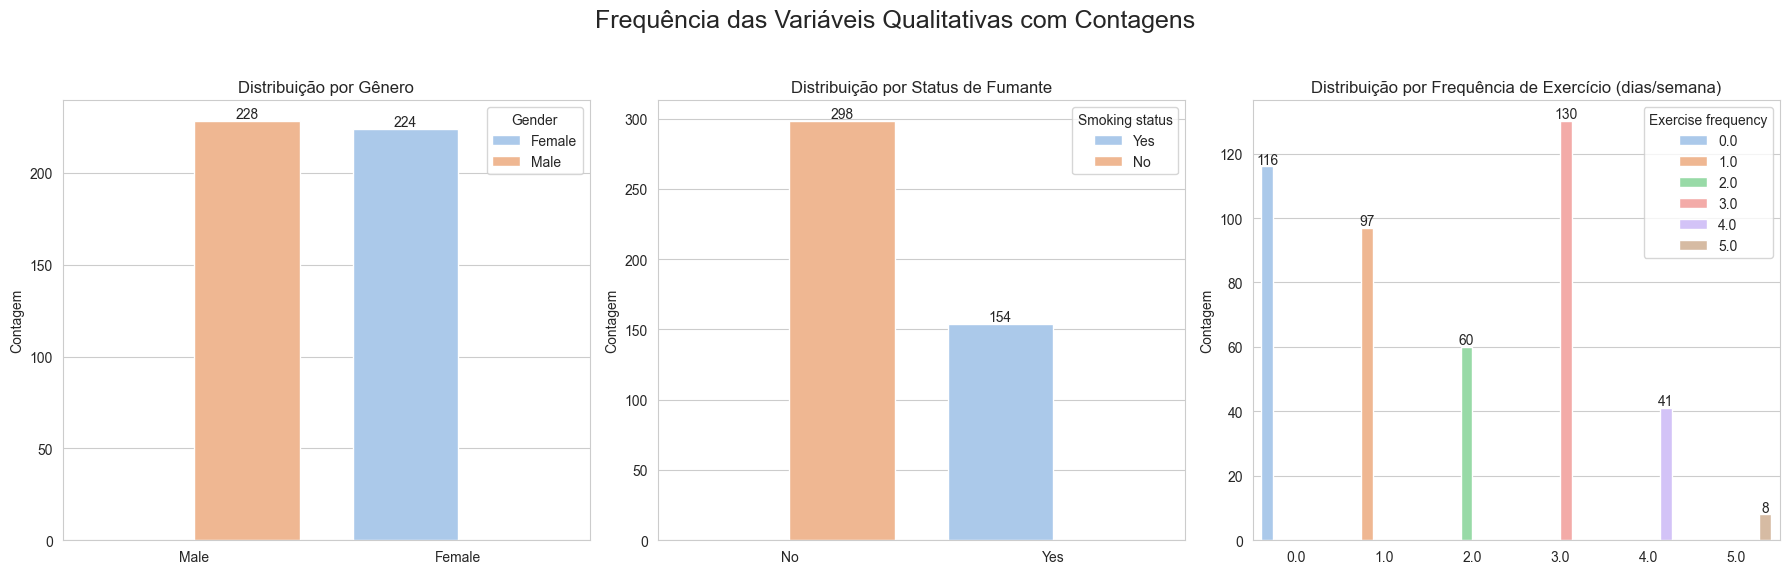

In [145]:
# @title Gráficos de frequência das variáveis qualitativas

# Define o estilo
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Frequência das Variáveis Qualitativas com Contagens', fontsize=18)

# Lista de colunas a serem plotadas
qual_cols = ['Gender', 'Smoking status', 'Exercise frequency']
titles = ['Distribuição por Gênero', 'Distribuição por Status de Fumante', 'Distribuição por Frequência de Exercício (dias/semana)']

# Loop para criar cada gráfico
for i, col in enumerate(qual_cols):
    # Remover NaN antes de plotar
    data_to_plot = df_tratado[col].dropna()

    if col == 'Exercise frequency':
        order = sorted(data_to_plot.unique())
    else:
        order = data_to_plot.value_counts().index

    # Cria o gráfico de contagem
    ax = sns.countplot(data=df_tratado, x=col, hue=col, ax=axes[i], palette='pastel', order=order)
    axes[i].set_title(titles[i])
    axes[i].set_ylabel('Contagem')
    axes[i].set_xlabel('')

    # Loop que passa por cada barra (patch) no gráfico
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Só anotar se houver valores
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center',
                        xytext=(0, 5),
                        textcoords='offset points')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Análise Bivariada

### Nesta análise testamos as hipóteses:

- Eficiência do Sono:
  - Eficiência do Sono vs. Idade
  - Eficiência do Sono vs. Status de Fumante
  - Eficiência do Sono vs. Frequência de Exercícios

- Qualidade do sono e Exercícios:
  - Sono Leve vs. Frequência de Exercícios
  - Sono REM vs. Frequência de Exercícios
  - Sono Profundo vs. Frequência de Exercícios

- Qualidade do Sono e Consumo de Álcool:
  - Sono Leve vs. Consumo de Álcool
  - Sono REM vs. Consumo de Álcool
  - Sono Profundo vs. Consumo de Álcool

- Qualidade do sono e Consumo de Cafeína:
  - Sono Leve vs. Consumo de Cafeína
  - Sono REM vs. Consumo de Cafeína
  - Sono Profundo vs. Consumo de Cafeína

In [146]:
# @title Hipótese 1: Eficiência do Sono vs. Idade

print("Hipótese 1: Eficiência do Sono vs. Idade")
correlation_age = df_tratado['Age'].corr(df_tratado['Sleep efficiency'])
print(f"A correlação de Pearson entre Idade e Eficiência do Sono é: {correlation_age:.3f}")

Hipótese 1: Eficiência do Sono vs. Idade
A correlação de Pearson entre Idade e Eficiência do Sono é: 0.098


In [147]:
# @title Hipótese 2: Eficiência do Sono vs. Status de Fumante

print("Hipótese 2: Eficiência do Sono vs. Status de Fumante")
smoking_stats = df_tratado.groupby('Smoking status')['Sleep efficiency'].mean()
print(f"Eficiência média (Fumantes): {smoking_stats['Yes']:.3f}")
print(f"Eficiência média (Não Fumantes): {smoking_stats['No']:.3f}")

Hipótese 2: Eficiência do Sono vs. Status de Fumante
Eficiência média (Fumantes): 0.734
Eficiência média (Não Fumantes): 0.817


In [148]:
# @title Hipótese 3: Eficiência do Sono vs. Frequência de Exercícios

print("Hipótese 3: Eficiência do Sono vs. Frequência de Exercícios")
exercise_stats = df_tratado.groupby('Exercise frequency')['Sleep efficiency'].mean()
print("Eficiência média do sono por frequência de exercício:")
print(exercise_stats)

Hipótese 3: Eficiência do Sono vs. Frequência de Exercícios
Eficiência média do sono por frequência de exercício:
Exercise frequency
0.0    0.743879
1.0    0.774124
2.0    0.806167
3.0    0.799154
4.0    0.881463
5.0    0.851250
Name: Sleep efficiency, dtype: float64


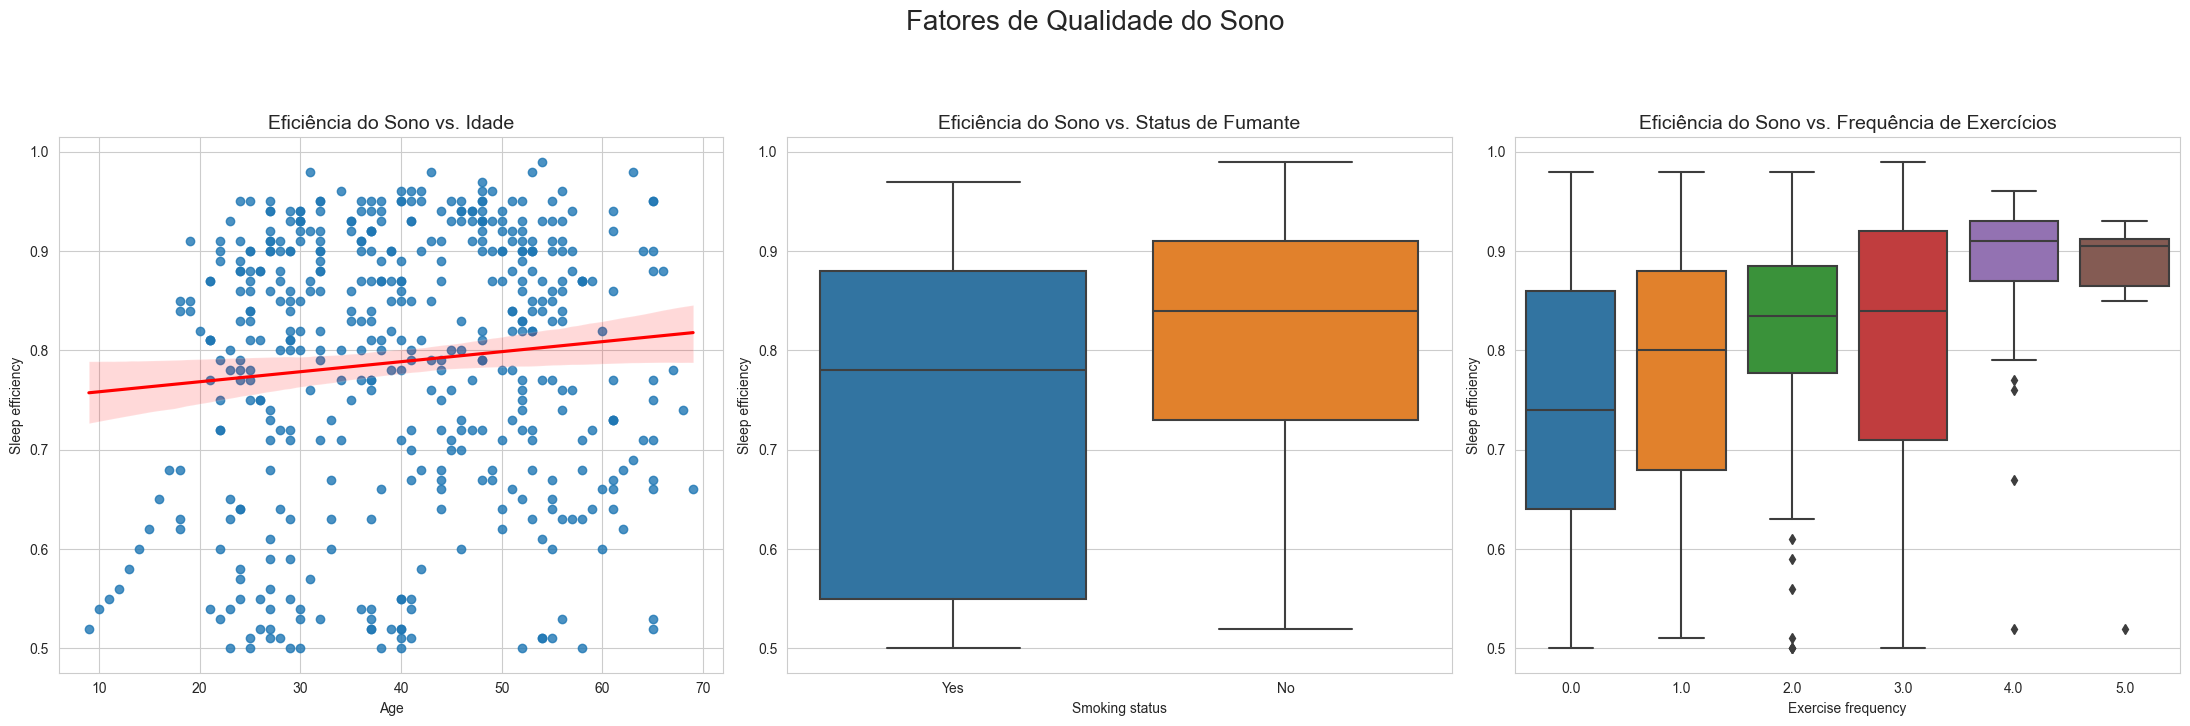

In [149]:
# @title Gráficos das análises iniciais

sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(22, 7))
fig.suptitle('Fatores de Qualidade do Sono', fontsize=20, y=1.03)

# Gráfico 1: Eficiência do Sono vs. Idade
sns.regplot(data=df_tratado, x='Age', y='Sleep efficiency', ax=axes[0], line_kws={"color": "red"})
axes[0].set_title('Eficiência do Sono vs. Idade', fontsize=14)

# Gráfico 2: Eficiência do Sono vs. Status de Fumante
sns.boxplot(data=df_tratado, x='Smoking status', y='Sleep efficiency', ax=axes[1])
axes[1].set_title('Eficiência do Sono vs. Status de Fumante', fontsize=14)

# Gráfico 3: Eficiência do Sono vs. Frequência de Exercícios
sns.boxplot(data=df_tratado, x='Exercise frequency', y='Sleep efficiency', ax=axes[2])
axes[2].set_title('Eficiência do Sono vs. Frequência de Exercícios', fontsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [150]:
# @title Hipótese 4: Sono Leve vs. Frequência de exercicios

print("Hipotese 4: Sono Leve vs. Frequência de Exercícios")
exercise_stats_Light = df_tratado.groupby('Exercise frequency')['Light sleep percentage'].mean()
print("Eficiência média do sono por frequência de exercício")
print(exercise_stats_Light)

Hipotese 4: Sono Leve vs. Frequência de Exercícios
Eficiência média do sono por frequência de exercício
Exercise frequency
0.0    29.931034
1.0    24.412371
2.0    20.950000
3.0    23.446154
4.0    18.341463
5.0    25.625000
Name: Light sleep percentage, dtype: float64


In [151]:
# @title Hipótese 5: Sono REM vs. Frequência de Exercícios

print("Hipotese 5: Sono REM vs. Frequência de exercicios")
exercise_stats_REM = df_tratado.groupby('Exercise frequency')['REM sleep percentage'].mean()
print("Eficiência média do sono por frequência de exercício")
print(exercise_stats_REM)

Hipotese 5: Sono REM vs. Frequência de exercicios
Eficiência média do sono por frequência de exercício
Exercise frequency
0.0    21.870690
1.0    23.958763
2.0    20.933333
3.0    23.253846
4.0    22.146341
5.0    21.750000
Name: REM sleep percentage, dtype: float64


In [152]:
# @title Hipótese 6: Sono Profundo vs. Frequência de Exercícios

print("Hipotese 6: Sono Profundo vs. Frequência de exercicios")
exercise_stats_Deep = df_tratado.groupby('Exercise frequency')['Deep sleep percentage'].mean()
print("Eficiência média do sono por frequência de exercício")
print(exercise_stats_Deep)

Hipotese 6: Sono Profundo vs. Frequência de exercicios
Eficiência média do sono por frequência de exercício
Exercise frequency
0.0    48.198276
1.0    51.628866
2.0    58.116667
3.0    53.300000
4.0    59.512195
5.0    52.625000
Name: Deep sleep percentage, dtype: float64


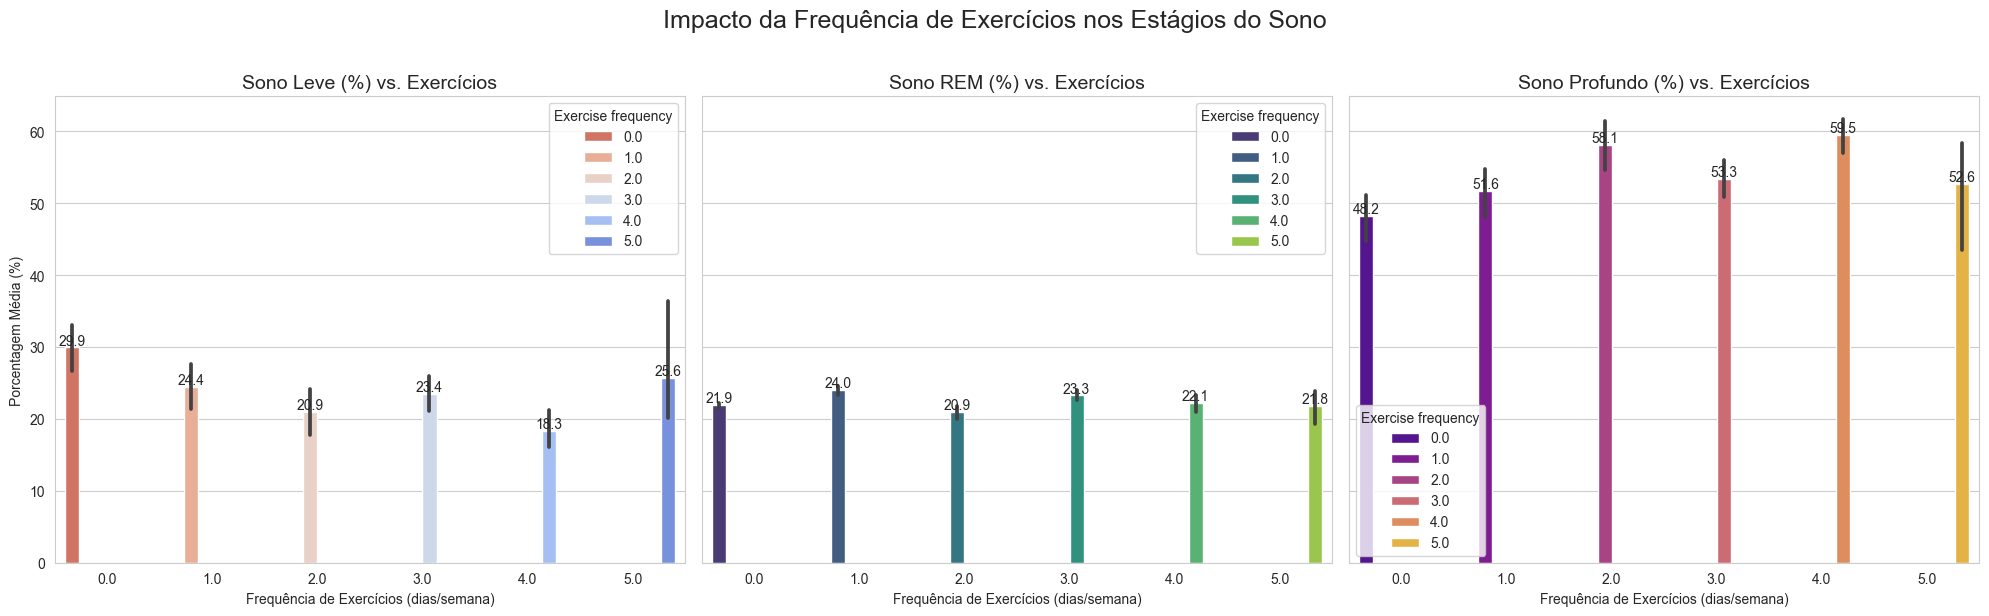

In [153]:
# @title Gráficos comparativos da qualidade do sono com frequência de exercícios

sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
fig.suptitle('Impacto da Frequência de Exercícios nos Estágios do Sono', fontsize=18, y=1.02)

# Gráfico 1: Hipótese 4 - Sono Leve
ax1 = sns.barplot(data=df_tratado, x='Exercise frequency', y='Light sleep percentage', ax=axes[0], palette='coolwarm_r', hue='Exercise frequency')
axes[0].set_title('Sono Leve (%) vs. Exercícios', fontsize=14)
axes[0].set_xlabel('Frequência de Exercícios (dias/semana)')
axes[0].set_ylabel('Porcentagem Média (%)')

# Gráfico 2: Hipótese 5 - Sono REM
ax2 = sns.barplot(data=df_tratado, x='Exercise frequency', y='REM sleep percentage', ax=axes[1], palette='viridis', hue='Exercise frequency')
axes[1].set_title('Sono REM (%) vs. Exercícios', fontsize=14)
axes[1].set_xlabel('Frequência de Exercícios (dias/semana)')
axes[1].set_ylabel('')

# Gráfico 3: Hipótese 6 - Sono Profundo
ax3 = sns.barplot(data=df_tratado, x='Exercise frequency', y='Deep sleep percentage', ax=axes[2], palette='plasma', hue='Exercise frequency')
axes[2].set_title('Sono Profundo (%) vs. Exercícios', fontsize=14)
axes[2].set_xlabel('Frequência de Exercícios (dias/semana)')
axes[2].set_ylabel('')

# --- CÓDIGO ADICIONADO PARA EXIBIR OS VALORES ---
# Loop que passa por cada um dos três gráficos (ax1, ax2, ax3)
for ax in [ax1, ax2, ax3]:
    # Para cada gráfico, ele passa por cada barra (patch)
    for p in ax.patches:
        height = p.get_height()
        # E adiciona a anotação com o valor da altura da barra
        ax.annotate(f'{height:.1f}', # Formata o valor para 1 casa decimal
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

In [154]:
# @title Hipótese 7: Sono Leve vs. Consumo de Álcool

print("Hipotese 7: Sono Leve vs. Consumo de Álcool")
alcohol_stats_Light = df_tratado.groupby('Alcohol consumption')['Light sleep percentage'].mean()
print("Eficiência média do sono por consumo de alcool")
print(alcohol_stats_Light)

Hipotese 7: Sono Leve vs. Consumo de Álcool
Eficiência média do sono por consumo de alcool
Alcohol consumption
0.0    19.992308
1.0    21.333333
2.0    38.864865
3.0    31.104167
4.0    35.782609
5.0    33.266667
Name: Light sleep percentage, dtype: float64


In [155]:
# @title Hipótese 8: Sono REM vs. Consumo de Álcool

print("Hipotese 8: Sono REM vs. Consumo de Álcool")
alcohol_stats_REM = df_tratado.groupby('Alcohol consumption')['REM sleep percentage'].mean()
print("Eficiência média do sono por consumo de alcool")
print(alcohol_stats_REM)

Hipotese 8: Sono REM vs. Consumo de Álcool
Eficiência média do sono por consumo de alcool
Alcohol consumption
0.0    22.723077
1.0    22.351852
2.0    22.297297
3.0    23.770833
4.0    20.956522
5.0    21.966667
Name: REM sleep percentage, dtype: float64


In [156]:
# @title Hipótese 9: Sono Profundo vs. Consumo de Álcool

print("Hipotese 9: Sono Profundo vs. Consumo de Álcool")
alcohol_stats_Deep = df_tratado.groupby('Alcohol consumption')['Deep sleep percentage'].mean()
print("Eficiência média do sono por consumo de alcool")
print(alcohol_stats_Deep)

Hipotese 9: Sono Profundo vs. Consumo de Álcool
Eficiência média do sono por consumo de alcool
Alcohol consumption
0.0    57.284615
1.0    56.314815
2.0    38.837838
3.0    45.125000
4.0    43.260870
5.0    44.766667
Name: Deep sleep percentage, dtype: float64


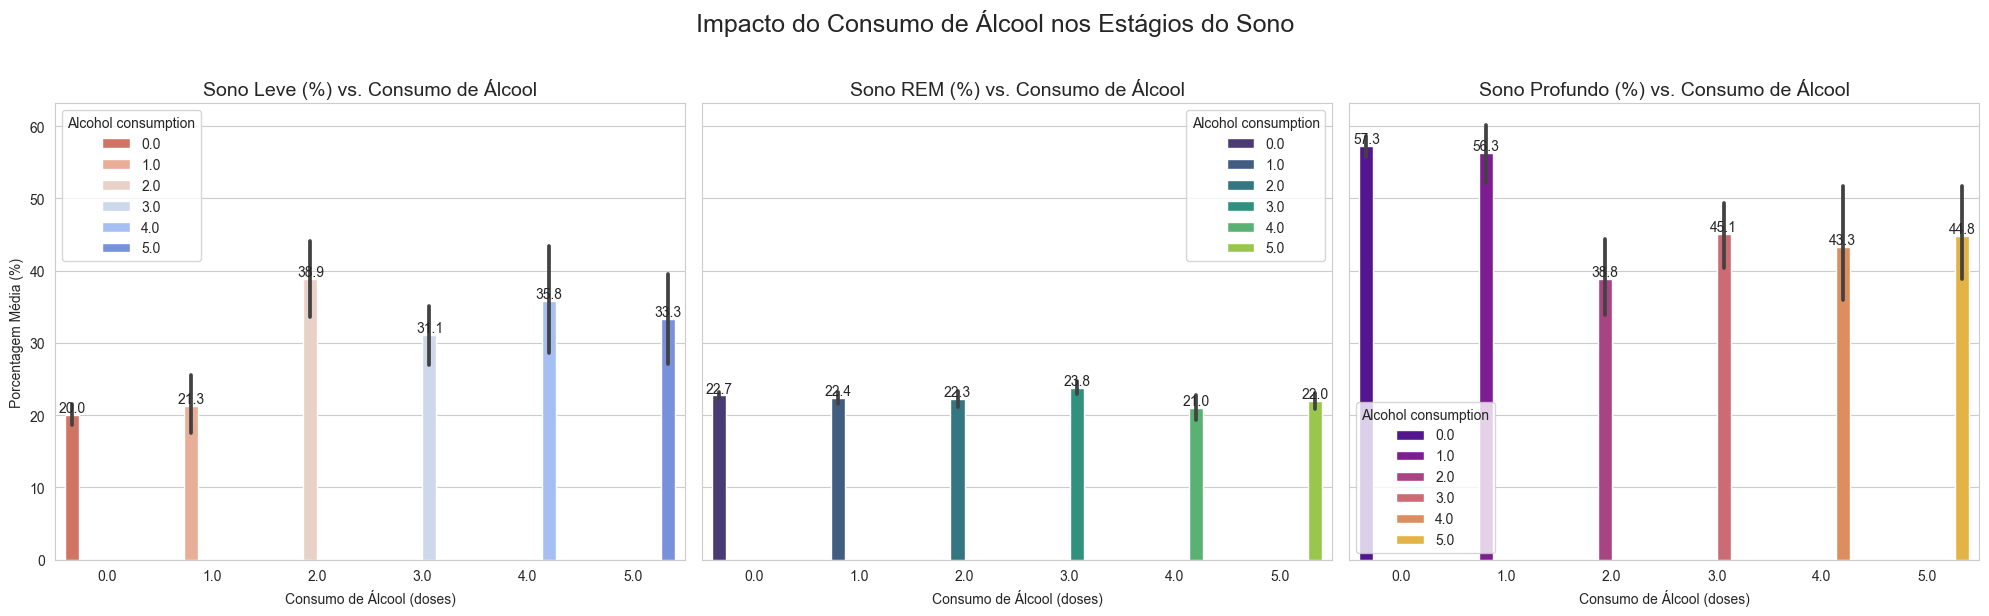

In [157]:
# @title Gráficos comparativos da qualidade do sono com consumo de álcool

sns.set_style("whitegrid")
# Cria a figura com 3 eixos (1 linha, 3 colunas)
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
fig.suptitle('Impacto do Consumo de Álcool nos Estágios do Sono', fontsize=18, y=1.02)

# Gráfico 1: Hipótese 7 - Sono Leve (COM CORREÇÃO)
ax1 = sns.barplot(data=df_tratado, x='Alcohol consumption', y='Light sleep percentage', ax=axes[0], palette='coolwarm_r', hue='Alcohol consumption')
axes[0].set_title('Sono Leve (%) vs. Consumo de Álcool', fontsize=14)
axes[0].set_xlabel('Consumo de Álcool (doses)')
axes[0].set_ylabel('Porcentagem Média (%)')

# Gráfico 2: Hipótese 8 - Sono REM (COM CORREÇÃO)
ax2 = sns.barplot(data=df_tratado, x='Alcohol consumption', y='REM sleep percentage', ax=axes[1], palette='viridis', hue='Alcohol consumption')
axes[1].set_title('Sono REM (%) vs. Consumo de Álcool', fontsize=14)
axes[1].set_xlabel('Consumo de Álcool (doses)')
axes[1].set_ylabel('')

# Gráfico 3: Hipótese 9 - Sono Profundo (COM CORREÇÃO)
ax3 = sns.barplot(data=df_tratado, x='Alcohol consumption', y='Deep sleep percentage', ax=axes[2], palette='plasma', hue='Alcohol consumption')
axes[2].set_title('Sono Profundo (%) vs. Consumo de Álcool', fontsize=14)
axes[2].set_xlabel('Consumo de Álcool (doses)')
axes[2].set_ylabel('')

# Loop para adicionar os valores em CADA gráfico
for ax in [ax1, ax2, ax3]:
  for p in ax.patches:
      height = p.get_height()
      ax.annotate(f'{height:.1f}', # Formata o número para ter 1 casa decimal
                  (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='center',
                  xytext=(0, 5),
                  textcoords='offset points')

plt.tight_layout()
plt.show()

In [158]:
# @title Hipótese 10: Sono Leve vs. Consumo de Cafeína

print("Hipotese 10: Sono Leve vs. Consumo de Cafeína")
Caffeine_stats_Light = df_tratado.groupby('Caffeine consumption')['Light sleep percentage'].mean()
print("Eficiência média do sono por consumo de cafeina")
print(Caffeine_stats_Light)

Hipotese 10: Sono Leve vs. Consumo de Cafeína
Eficiência média do sono por consumo de cafeina
Caffeine consumption
0.0      24.625592
25.0     22.403846
50.0     28.093458
75.0     19.400000
100.0    15.000000
200.0    17.500000
Name: Light sleep percentage, dtype: float64


In [159]:
# @title Hipótese 11: Sono REM vs. Consumo de Cafeína

print("Hipotese 11: Sono REM vs. Consumo de cafeína")
Caffeine_stats_Rem = df_tratado.groupby('Caffeine consumption')['REM sleep percentage'].mean()
print("Eficiência média do sono por consumo de cafeina")
print(Caffeine_stats_Rem)

Hipotese 11: Sono REM vs. Consumo de cafeína
Eficiência média do sono por consumo de cafeina
Caffeine consumption
0.0      22.393365
25.0     22.057692
50.0     23.766355
75.0     22.160000
100.0    20.000000
200.0    21.500000
Name: REM sleep percentage, dtype: float64


In [160]:
# @title Hipótese 12: Sono Profundo vs. Consumo de Cafeína

print("Hipotese 12: Sono Profundo vs. Consumo de cafeina")
Caffeine_stats_Deep = df_tratado.groupby('Caffeine consumption')['Deep sleep percentage'].mean()
print("Eficiência média do sono por consumo de cafeina")
print(Caffeine_stats_Deep)

Hipotese 12: Sono Profundo vs. Consumo de cafeina
Eficiência média do sono por consumo de cafeina
Caffeine consumption
0.0      52.981043
25.0     55.538462
50.0     48.140187
75.0     58.440000
100.0    65.000000
200.0    61.000000
Name: Deep sleep percentage, dtype: float64


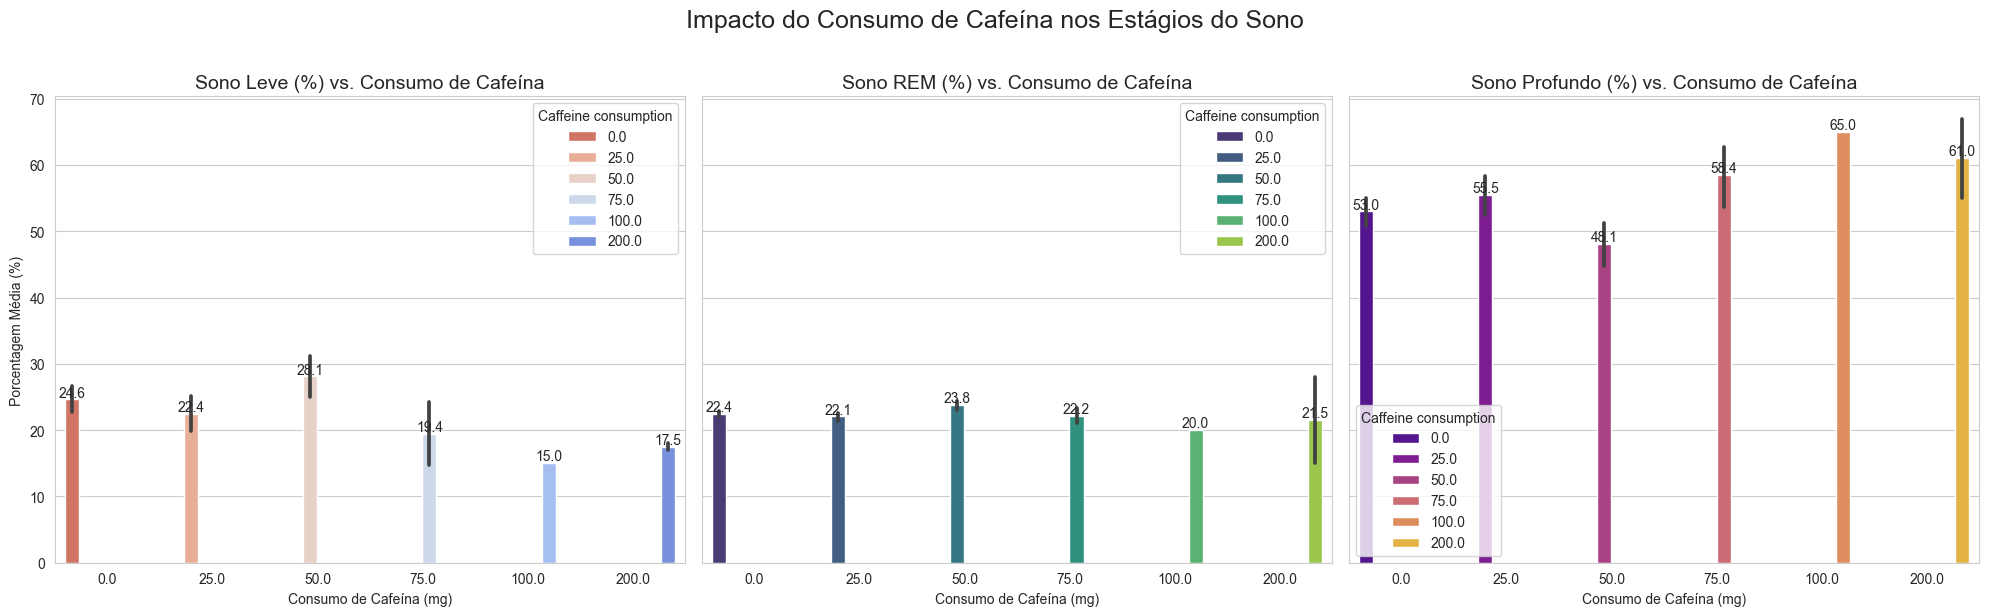

In [161]:
# @title Gráficos comparativos da qualidade do sono com consumo de cafeína

sns.set_style("whitegrid")
# Cria a figura com 3 eixos (1 linha, 3 colunas)
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
fig.suptitle('Impacto do Consumo de Cafeína nos Estágios do Sono', fontsize=18, y=1.02)

# Gráfico 1: Hipótese 10 - Sono Leve
ax1 = sns.barplot(data=df_tratado, x='Caffeine consumption', y='Light sleep percentage', ax=axes[0], palette='coolwarm_r', hue='Caffeine consumption')
axes[0].set_title('Sono Leve (%) vs. Consumo de Cafeína', fontsize=14)
axes[0].set_xlabel('Consumo de Cafeína (mg)')
axes[0].set_ylabel('Porcentagem Média (%)')

# Gráfico 2: Hipótese 11 - Sono REM
ax2 = sns.barplot(data=df_tratado, x='Caffeine consumption', y='REM sleep percentage', ax=axes[1], palette='viridis', hue='Caffeine consumption')
axes[1].set_title('Sono REM (%) vs. Consumo de Cafeína', fontsize=14)
axes[1].set_xlabel('Consumo de Cafeína (mg)')
axes[1].set_ylabel('')

# Gráfico 3: Hipótese 12 - Sono Profundo
ax3 = sns.barplot(data=df_tratado, x='Caffeine consumption', y='Deep sleep percentage', ax=axes[2], palette='plasma', hue='Caffeine consumption')
axes[2].set_title('Sono Profundo (%) vs. Consumo de Cafeína', fontsize=14)
axes[2].set_xlabel('Consumo de Cafeína (mg)')
axes[2].set_ylabel('')

# Loop para adicionar os valores em CADA gráfico
for ax in [ax1, ax2, ax3]:
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}', # Formata o número para ter 1 casa decimal
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

# Análise Multivariada

Análise Multivariada


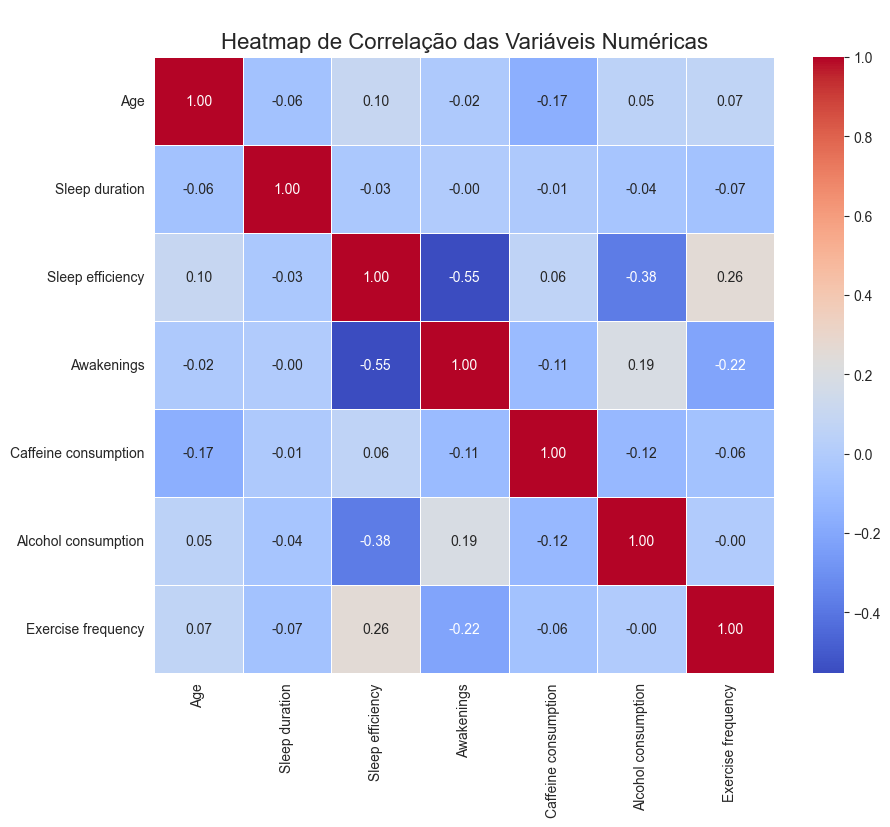

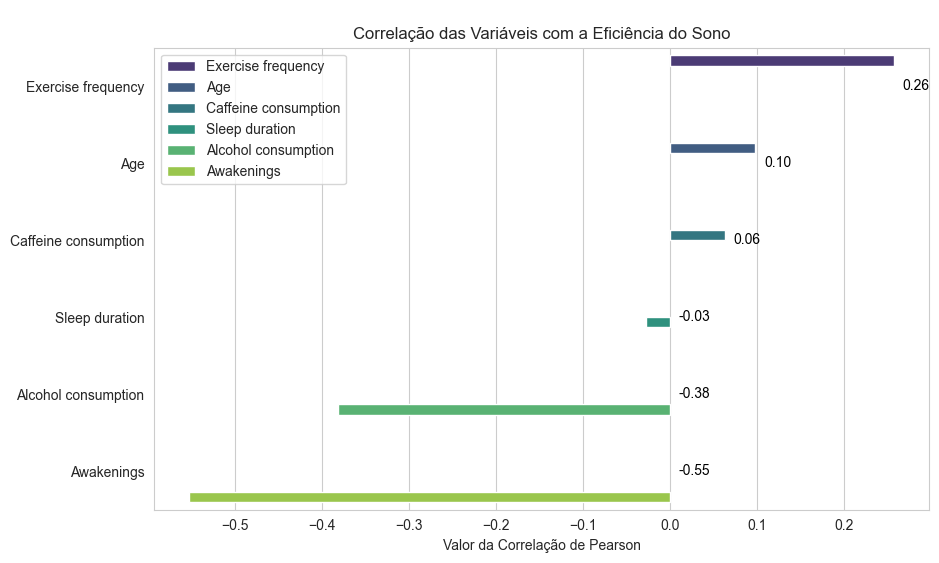

In [163]:
# @title Análise Multivariada
print("Análise Multivariada")
numeric_cols = ['Age', 'Sleep duration', 'Sleep efficiency', 'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']
correlation_matrix = df_tratado[numeric_cols].corr()

# Gráfico da Matriz de Correlação (Heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('\nHeatmap de Correlação das Variáveis Numéricas', fontsize=16)
plt.show()

# Gráfico de Correlação com eficiência do sono
plt.figure(figsize=(10,6))
sleep_corr = correlation_matrix['Sleep efficiency'].sort_values(ascending=False)
sleep_corr = sleep_corr[sleep_corr.index != 'Sleep efficiency']

sns.barplot(x=sleep_corr.values, y=sleep_corr.index, hue=sleep_corr.index, palette='viridis')

plt.xlabel("Valor da Correlação de Pearson")
plt.ylabel("")

for index, value in enumerate(sleep_corr):
    text_position = value if value >= 0 else 0
    plt.text(text_position + 0.01, index, f'{value:.2f}', color='black', ha='left', va='center')

plt.title('\nCorrelação das Variáveis com a Eficiência do Sono')
plt.show()

# Sumário da Análise de Dados do Sono

### Padrões Principais:

- Exercício Físico: A prática regular de exercícios melhora a eficiência do sono.
- Álcool: O consumo de álcool, especialmente com frequência, piora a eficiência do sono.
- Duração vs. Qualidade: Dormir por mais tempo não garante um sono de melhor qualidade; a eficiência é um fator independente.

### Dados e Tratamento:

- O dataset continha dados faltantes, que foram tratados preenchendo-os com a mediana para não perder informações.
- Foram identificados valores extremos (outliers), como participantes com eficiência de sono muito baixa, que podem influenciar as médias.

### Correlações Mais Fortes com a Eficiência do Sono:
- Negativas:
  - O número de despertares (-0.55)
  - O consumo de álcool (-0.38)  

- Positiva:
  - A frequência de exercícios (+0.26)

O número de despertares e o consumo de álcool são os fatores que mais prejudicam a eficiência, enquanto que a maior freguência de exercícios semanais é o principal fator benéfico identificado.